# Import lib

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Exercise 
- In this below I have to revise 4 exercise
  - mu = 0 
  - mu1 = mu2
  - mu = trung bình cộng của mu2 (mean(mu2))
  - vector

## Exercise 1
- mu = 0 

### Run

In [2]:
## View
n=1
mu=0 #du`ng de tao data x_obs, muc dich la tinh p_value de xac dinh mu=0 hay mu !=0
std =1 #standard deviation (xich ma) - độ lệch chuẩn
x_obs = np.random.normal(loc=mu,scale=std,size=(n,1))

In [3]:
x_obs

array([[-0.10746333]])

In [4]:
def run():
    #generate synthetic data
    n=1
    mu=0 #du`ng de tao data x_obs, muc dich la tinh p_value de xac dinh mu=0 hay mu !=0
    std =1 #standard deviation (xich ma) - độ lệch chuẩn
    x_obs = np.random.normal(loc=mu,scale=std,size=(n,1))

    #we want to the following hypothesis
    #H_0: mu=0 vs H_1: mu!=0

    #construct observed test-statistic
    T_obs = x_obs
    abs_T_obs = np.abs(T_obs)
    # print(abs_T_obs)
    
    #compute p-value
    p_value = 2 * (1- norm.cdf(abs_T_obs,loc=0, scale=1))
    # print(p_value)
    

    return p_value



In [5]:
run()

array([[0.15706573]])

In [7]:

max_iteration =10000
list_p_value =[]
alpha = 0.05 #kiểm soát mức độ lỗi
count=0

for _ in range(max_iteration):
    p_value = run()
    list_p_value.append(p_value)

    if p_value <= alpha:
        count +=1
print('Count: ',count)
print('FPR: ',count/max_iteration)

# Plot the distribution of p-values
list_p_value = np.array(list_p_value)
print(list_p_value.shape)
print(list_p_value[0:5])
print(list_p_value[2][0][0])
# list_p_value = list_p_value.flatten()
# print(list_p_value.shape)
# plt.hist(list_p_value) #-> uniform distribution
# plt.show()



Count:  504
FPR:  0.0504
(10000, 1, 1)
[[[0.20032624]]

 [[0.94535092]]

 [[0.18037036]]

 [[0.22891189]]

 [[0.45228311]]]
0.18037036078620972


### Test

In [6]:
def test():
  max_iteration =10000
  list_p_value =[]
  alpha = 0.05 #kiểm soát mức độ lỗi
  count=0

  for _ in range(max_iteration):
    p_value = run()
    list_p_value.append(p_value)

    if p_value <= alpha:
      count +=1
  print('Count: ',count)
  print('FPR: ',count/max_iteration)

  # Plot the distribution of p-values
  list_p_value = np.array(list_p_value)
  print(list_p_value.shape)
  list_p_value = list_p_value.flatten()
  print(list_p_value.shape)
  # plt.hist(list_p_value) #-> uniform distribution
  # plt.show()

test()

Count:  498
FPR:  0.0498
(10000, 1, 1)
(10000,)


## Exercise 2
- mu1 = mu2

In [8]:
def run_2():

    #generate synthetic data
    n=1 #phản hồi loại thuốc
    mu=2 #du`ng de tao data x_obs, muc dich la tinh p_value de xac dinh mu=0 hay mu !=0
    std =1 #standard deviation (xich ma) - độ lệch chuẩn

    x_obs_1 = np.random.normal(loc=mu,scale=std,size=(n))[0]
    x_obs_2 = np.random.normal(loc=mu,scale=std,size=(n))[0]

    # print(x_obs)

    #we want to the following hypothesis
    #H_0: mu_1=mu_2 vs H_1: mu1!=mu_2
    T_obs = x_obs_1 - x_obs_2

    # Distribution of T, CHú ý là phải dùng công thức của thầy.
    # T ~ N(mu1 - mu2, (1^2 + 1^2))
    # T ~ N(mu1 - mu2, (2))
    
    # Số 2 là variance còn scale phải lấy std = Căn bậc 2. 

    #compute p-value
    cdf = norm.cdf(T_obs, loc=0, scale=np.sqrt(2))
    p_value = 2 * min(cdf, 1 - cdf)
    # print(p_value)

    return p_value

run_2()

0.8573116786501107

Count:  523
FPR:  0.0523


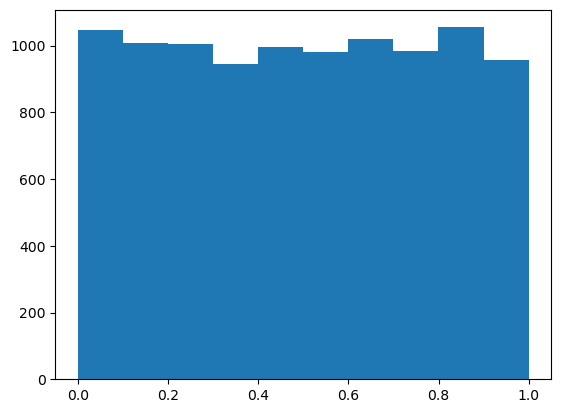

In [12]:
def test2():
  max_iteration =10000
  list_p_value =[]
  alpha = 0.05 #kiểm soát mức độ lỗi
  count=0

  for _ in range(max_iteration):
    p_value = run_2()
    list_p_value.append(p_value)

    if p_value <= alpha:
      count +=1
  print('Count: ',count)
  print('FPR: ',count/max_iteration)

  # Plot the distribution of p-values
  list_p_value = np.array(list_p_value)
  list_p_value = list_p_value.flatten()
  plt.hist(list_p_value) #-> uniform distribution
  plt.show()

test2()

## Exercise 3
- mu = trung bình cộng của mu2 (mean(mu2))

In [13]:
def run_3():

    #generate synthetic data
    n=10 #phản hồi loại thuốc
    mu=4 #du`ng de tao data x_obs, muc dich la tinh p_value de xac dinh mu=0 hay mu !=0
    std =1 #standard deviation (xich ma) - độ lệch chuẩn

    x_obs_1 = np.random.normal(loc=mu,scale=std,size=(1))
    x_obs_2 = np.random.normal(loc=mu,scale=std,size=(n))

    # print(x_obs)

    #we want to the following hypothesis
    #H_0: mu_1=mu_2 vs H_1: mu1!=mu_2
    # T_obs = x_obs_1[0] - sum(x_obs_2) / n
    T_obs = x_obs_1[0] - np.mean(x_obs_2)
    
    scale =  np.sqrt(1.1) 
    # Số 2 là variance còn scale phải lấy std = Căn bậc 2. 

    #compute p-value
    cdf = norm.cdf(T_obs, loc=0, scale=scale)
    p_value = 2 * min(cdf, 1 - cdf)
    # print(p_value)

    return p_value

run_3()

0.9764164582211354

Count:  537
FPR:  0.0537


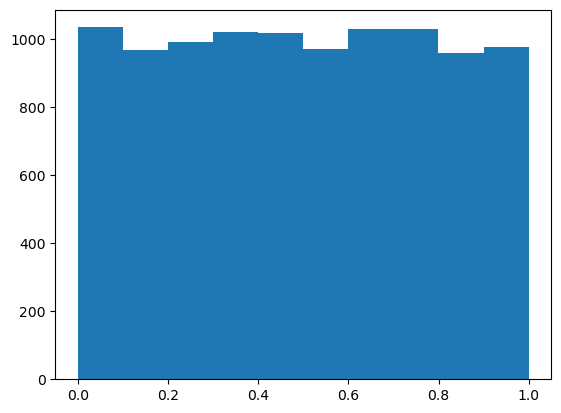

In [14]:
def test3():
  max_iteration =10000
  list_p_value =[]
  alpha = 0.05 #kiểm soát mức độ lỗi
  count=0

  for _ in range(max_iteration):
    p_value = run_3()
    list_p_value.append(p_value)
    # print(p_value)
    if p_value <= alpha:
      count +=1
  print('Count: ',count)
  print('FPR: ',count/max_iteration)

  # Plot the distribution of p-values
  list_p_value = np.array(list_p_value)
  list_p_value = list_p_value.flatten()
  plt.hist(list_p_value) #-> uniform distribution
  plt.show()

test3()

## Exercise 4
- Vector

### View

In [39]:
n = 10
mu = np.zeros((n, 1))
Sigma = np.identity(n)

x = np.random.multivariate_normal(mu.flatten(), Sigma)
x_re = x.reshape((n, 1))

eta = np.zeros((n, 1))

eta[1] = 1.0

# Construct test-statistic

T = np.dot(eta.T, x_re)[0][0]

# Distribution of T ~ N(mu1 - mu2)
variance_T = np.dot(eta.T, np.dot(Sigma, eta))[0][0]
sigma_T = np.sqrt(variance_T)

cdf = norm.cdf(T, loc=0, scale=sigma_T)
p_value = 2 * min(cdf, 1 - cdf)
    

In [23]:
mu

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [22]:
Sigma

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [31]:
x

array([-1.10356667, -1.84244145, -0.92942181, -0.61263046, -1.86940728,
       -0.37520253,  0.99201631, -1.09820727,  0.14585426, -0.87670075])

In [38]:
x_re.shape

(10, 1)

In [37]:
eta.shape

(10, 1)

In [40]:
T

array([[1.57219566]])

In [41]:
variance_T

1.0

### Run

In [46]:
def run4():
    # Define 
    
    n = 10 
    mu = np.zeros((n, 1))
    
    Sigma = np.identity(n)  # Std 
    
    x = np.random.multivariate_normal(mu.flatten(), Sigma) 
    x = x.reshape((n, 1))
    
    eta = np.zeros((n, 1))
    
    eta[1] = 1.0
    
    
    # Construct test-statistic
    T = np.dot(eta.T, x)[0][0]
    
    # Distribution of T ~ N(mu1 - mu2)
    variance_T = np.dot(eta.T, np.dot(Sigma, eta))[0][0]
    sigma_T = np.sqrt(variance_T)
    
    cdf = norm.cdf(T, loc=0, scale=sigma_T)
    
    # p-value
    p_value = 2 * min(cdf, 1 - cdf)
    
    return p_value

Count:  521
FPR:  0.0521


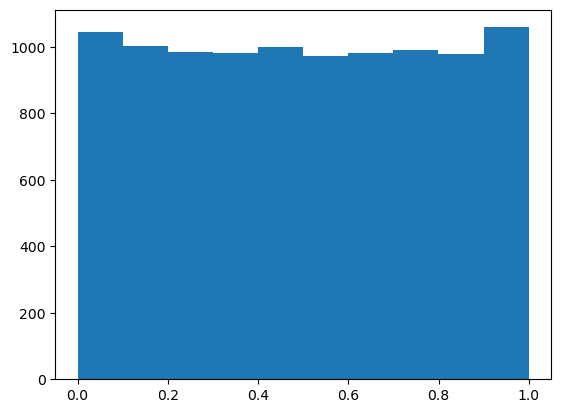

In [47]:
def test4():
  max_iteration =10000
  list_p_value =[]
  alpha = 0.05 #kiểm soát mức độ lỗi
  count=0

  for _ in range(max_iteration):
    p_value = run4()
    list_p_value.append(p_value)
    # print(p_value)
    if p_value <= alpha:
      count +=1
  print('Count: ',count)
  print('FPR: ',count/max_iteration)

  # Plot the distribution of p-values
  list_p_value = np.array(list_p_value)
  list_p_value = list_p_value.flatten()
  plt.hist(list_p_value) #-> uniform distribution
  plt.show()

test4()